In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
%matplotlib inline

In [2]:
train_set = pd.read_csv('training_dataset/training_data.csv')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424431 non-null  int64  
 1   Policy_Company                            424431 non-null  object 
 2   Policy_Installment_Term                   424431 non-null  int64  
 3   Policy_Billing_Code                       424431 non-null  object 
 4   Policy_Method_Of_Payment                  424431 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424431 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424431 non-null  object 
 7   Vehicle_Territory                         424431 non-null  int64  
 8   Vehicle_Make_Year                         424431 non-null  int64  
 9   Vehicle_Make_Description                  424431 non-null  object 
 10  Vehicle_Performance 

In [3]:
#shows top 5 rows for training data
train_set.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [4]:
#count number of types of variables
train_set['Vehicle_Bodily_Injury_Limit'].value_counts()

25-50      145145
100-300    130255
50-100     107950
250-500     21757
500-500       837
300-500       617
100-500       502
1M-1M          42
Name: Vehicle_Bodily_Injury_Limit, dtype: int64

In [5]:
train_set['EEA_Prior_Bodily_Injury_Limit'].value_counts()

20-50      145145
100-200    130255
40-100     107950
100-400     21757
300-300       837
200-400       617
75-300        502
750-750        42
Name: EEA_Prior_Bodily_Injury_Limit, dtype: int64

In [6]:
#train_set_dropped = train_set.dropna()

#Dropped outliers
train_set_dropped = train_set[train_set.EEA_Prior_Bodily_Injury_Limit != '750-750']

In [7]:
train_set_dropped['Vehicle_Bodily_Injury_Limit'].value_counts()

25-50      145145
100-300    130255
50-100     107950
250-500     21757
500-500       837
300-500       617
100-500       502
Name: Vehicle_Bodily_Injury_Limit, dtype: int64

In [8]:
train_set_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424389 entries, 0 to 424430
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424389 non-null  int64  
 1   Policy_Company                            424389 non-null  object 
 2   Policy_Installment_Term                   424389 non-null  int64  
 3   Policy_Billing_Code                       424389 non-null  object 
 4   Policy_Method_Of_Payment                  424389 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424389 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424389 non-null  object 
 7   Vehicle_Territory                         424389 non-null  int64  
 8   Vehicle_Make_Year                         424389 non-null  int64  
 9   Vehicle_Make_Description                  424389 non-null  object 
 10  Vehicle_Performance 

In [9]:
train_set_dropped.Loss_Ratio.value_counts()

0.00      405524
0.12         191
0.13         168
0.14         148
0.11         140
           ...  
126.91         1
195.38         1
969.41         1
36.05          1
31.60          1
Name: Loss_Ratio, Length: 4417, dtype: int64

In [10]:
train_set_dropped[train_set_dropped.Vehicle_Miles_To_Work == -1].Loss_Amount.std()

3752.583625179135

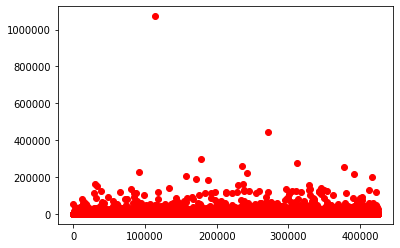

In [11]:
plt.plot(train_set_dropped[train_set_dropped.Vehicle_Miles_To_Work == -1][['Vehicle_Miles_To_Work', 'Loss_Amount']], 'ro')

In [12]:
#Picking "important" features
new_train_set = train_set_dropped[['Vehicle_Age_In_Years',                                    
                                   'Vehicle_Physical_Damage_Limit',
  #                                 'Vehicle_Miles_To_Work',
                                   'Driver_Minimum_Age',                          
                                   'Driver_Maximum_Age',                                        
                                   'EEA_Policy_Tenure',                                                                                  
                                   'Annual_Premium',
                                    'Loss_Amount']]

In [13]:
new_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424389 entries, 0 to 424430
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Vehicle_Age_In_Years           424389 non-null  int64  
 1   Vehicle_Physical_Damage_Limit  424389 non-null  int64  
 2   Driver_Minimum_Age             424389 non-null  int64  
 3   Driver_Maximum_Age             424389 non-null  int64  
 4   EEA_Policy_Tenure              424389 non-null  float64
 5   Annual_Premium                 424389 non-null  float64
 6   Loss_Amount                    424389 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 25.9 MB


In [49]:
#new_train_set['Driver_Maximum_Age']

In [14]:
#Calculating average age and deleting Maximum and Minimum ages as they are redundant
new_train_set['Driver_Mean_Age'] = (new_train_set.Driver_Maximum_Age + new_train_set.Driver_Minimum_Age)/2
new_train_set = new_train_set.drop(labels=['Driver_Maximum_Age', 'Driver_Minimum_Age'], axis=1)

#just a copy of new set to experiment with
#mock_set = new_train_set

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
#Experiments
#mock_set['Annual_Premium * Driver_Age'] = mock_set.Annual_Premium * mock_set.Driver_Age

In [565]:
#Experiments
#mock_set['log(Annual_Premium)'] = np.log(mock_set.Annual_Premium)

In [66]:
#Plotting heatmap of pair correlations of features
#plt.figure(figsize=(10,10))
#sns.heatmap(mock_set.corr(), annot=True)

In [15]:
new_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424389 entries, 0 to 424430
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Vehicle_Age_In_Years           424389 non-null  int64  
 1   Vehicle_Physical_Damage_Limit  424389 non-null  int64  
 2   EEA_Policy_Tenure              424389 non-null  float64
 3   Annual_Premium                 424389 non-null  float64
 4   Loss_Amount                    424389 non-null  float64
 5   Driver_Mean_Age                424389 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 22.7 MB


In [16]:
#Algorithm to convert all object types to One-hot dummies

obj_set = new_train_set.select_dtypes(include='object')
#obj_set = obj_set.join(new_train_set['Policy_Installment_Term'])

for i in obj_set.columns:
    one_hot = pd.get_dummies(new_train_set[i], prefix=i)
    new_train_set = new_train_set.drop(i, axis=1)
    new_train_set = new_train_set.join(one_hot)

In [17]:
new_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424389 entries, 0 to 424430
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Vehicle_Age_In_Years           424389 non-null  int64  
 1   Vehicle_Physical_Damage_Limit  424389 non-null  int64  
 2   EEA_Policy_Tenure              424389 non-null  float64
 3   Annual_Premium                 424389 non-null  float64
 4   Loss_Amount                    424389 non-null  float64
 5   Driver_Mean_Age                424389 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 22.7 MB


In [18]:
#Separating training set into data with Loss and without Loss
set_wout_loss = new_train_set[new_train_set.Loss_Amount == 0]
set_with_loss = new_train_set[new_train_set.Loss_Amount != 0]

In [19]:
#NOW. This is important!!! These are parameters for new training set creation
random.seed(10) #seed 
sample_size_array = [1000, 3000, 5000] #sample size for train sample
loss_fraction_array = [.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.2] #fraction of train sample that has loss
set_size = 30000 #<---- This is size of new training set

In [20]:
# THIS PART IS HARD TO EXPLAIN
#But basically, it is just constructing a new data set of 30000
sample_size = random.choice(sample_size_array)
loss_frac = random.choice(loss_fraction_array)
loss_num = int(sample_size * loss_frac)

sampled_set = pd.concat([set_wout_loss.sample(sample_size-loss_num, replace=True, random_state = 0), 
                             set_with_loss.sample(loss_num, replace=True, random_state = 0)],
                            ignore_index=True)

new_set = (sampled_set.sum()/sample_size).to_frame().T

std_set = pd.DataFrame(columns=["Driver_Mean_Age_Std",  
                                "Vehicle_Age_In_Years_Std", 
                                'Vehicle_Physical_Damage_Limit_Std',
#                                'Vehicle_Miles_To_Work_Std',
                                'Annual_Premium_Std',
                                'EEA_Policy_Tenure_Std'], dtype=np.float)

std_set = std_set.append({'Driver_Mean_Age_Std' : sampled_set.Driver_Mean_Age.std(), 
                          'Vehicle_Age_In_Years_Std' : sampled_set.Vehicle_Age_In_Years.std(),
                          'Vehicle_Physical_Damage_Limit_Std' : sampled_set.Vehicle_Physical_Damage_Limit.std(),
#                          'Vehicle_Miles_To_Work_Std' : sampled_set.Vehicle_Miles_To_Work.std(),
                          'Annual_Premium_Std' : sampled_set.Annual_Premium.std(),
                          'EEA_Policy_Tenure_Std': sampled_set.EEA_Policy_Tenure.std()} , ignore_index=True)

In [21]:
new_set

,Vehicle_Age_In_Years,Vehicle_Physical_Damage_Limit,EEA_Policy_Tenure,Annual_Premium,Loss_Amount,Driver_Mean_Age
0,7.0798,48990.9616,5.9517,331.13614,102.598874,46.9242


In [22]:
#THIS IS CONTINUATION OF PREVIOUS CODE TO CONSTRUCT A NEW TRAINING SET
for i in range(1,set_size):
    sample_size = random.choice(sample_size_array)
    loss_frac = random.choice(loss_fraction_array)
    loss_num = int(sample_size * loss_frac)
    
    sampled_set = pd.concat([set_wout_loss.sample(sample_size-loss_num, replace=True, random_state = i), 
                             set_with_loss.sample(loss_num, replace=True, random_state = i)],
                            ignore_index=True)
    
    new_set = pd.concat([new_set, (sampled_set.sum()/sample_size).to_frame().T], ignore_index=True);
    
    std_set = std_set.append({'Driver_Mean_Age_Std' : sampled_set.Driver_Mean_Age.std(), 
                              'Vehicle_Age_In_Years_Std' : sampled_set.Vehicle_Age_In_Years.std(),
                              'Vehicle_Physical_Damage_Limit_Std' : sampled_set.Vehicle_Physical_Damage_Limit.std(),
#                              'Vehicle_Miles_To_Work_Std' : sampled_set.Vehicle_Miles_To_Work.std(),
                              'Annual_Premium_Std' : sampled_set.Annual_Premium.std(),
                              'EEA_Policy_Tenure_Std': sampled_set.EEA_Policy_Tenure.std()} , ignore_index=True)

In [23]:
new_set = new_set.join(std_set)

In [25]:
new_set.head()

,Vehicle_Age_In_Years,Vehicle_Physical_Damage_Limit,EEA_Policy_Tenure,Annual_Premium,Loss_Amount,Driver_Mean_Age,Driver_Mean_Age_Std,Vehicle_Age_In_Years_Std,Vehicle_Physical_Damage_Limit_Std,Annual_Premium_Std,EEA_Policy_Tenure_Std
0,7.079800,48990.961600,5.951700,331.136140,102.598874,46.924200,15.744451,2.561942,38974.664674,205.915622,6.727003
1,7.078333,47388.289333,5.733733,339.325737,387.394897,46.743833,15.697445,2.583748,35804.362186,212.746602,6.505932
2,7.006000,47523.959600,5.990520,334.330106,37.310986,46.834600,15.866660,2.592626,35207.402293,211.749383,6.694347
3,6.904000,47519.952000,5.873300,345.549600,442.980190,47.038000,15.463220,2.616033,36873.619646,186.531935,6.424331
4,7.067667,49233.297333,5.772033,334.978783,222.262727,46.643333,15.813975,2.530195,39564.557605,202.540343,6.351606


In [26]:
#CALCULATING LOSS RATIO 
new_set['Loss_Ratio'] = np.log(new_set['Loss_Amount']/new_set['Annual_Premium'])
new_set = new_set.drop(['Loss_Amount'], axis=1)

In [27]:
new_set.head()

,Vehicle_Age_In_Years,Vehicle_Physical_Damage_Limit,EEA_Policy_Tenure,Annual_Premium,Driver_Mean_Age,Driver_Mean_Age_Std,Vehicle_Age_In_Years_Std,Vehicle_Physical_Damage_Limit_Std,Annual_Premium_Std,EEA_Policy_Tenure_Std,Loss_Ratio
0,7.079800,48990.961600,5.951700,331.136140,46.924200,15.744451,2.561942,38974.664674,205.915622,6.727003,-1.171703
1,7.078333,47388.289333,5.733733,339.325737,46.743833,15.697445,2.583748,35804.362186,212.746602,6.505932,0.132484
2,7.006000,47523.959600,5.990520,334.330106,46.834600,15.866660,2.592626,35207.402293,211.749383,6.694347,-2.192841
3,6.904000,47519.952000,5.873300,345.549600,47.038000,15.463220,2.616033,36873.619646,186.531935,6.424331,0.248389
4,7.067667,49233.297333,5.772033,334.978783,46.643333,15.813975,2.530195,39564.557605,202.540343,6.351606,-0.410207


In [28]:
#Separating X features from y target
X = new_set.drop('Loss_Ratio', axis=1)
y = new_set[['Loss_Ratio']]

In [29]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 36)

In [30]:
#Scaling train set
# scale train dataset
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

In [31]:
#SKLEARN GRADIENT BOOST MODEL
#WE CAN ACTUALLY TRY XGBOOST HERE
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gdb = GradientBoostingRegressor(learning_rate=0.1)
gdb.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
#Calculating mean squeared error
mean_squared_error(y_test, gdb.predict(X_test))

0.4027997511685041

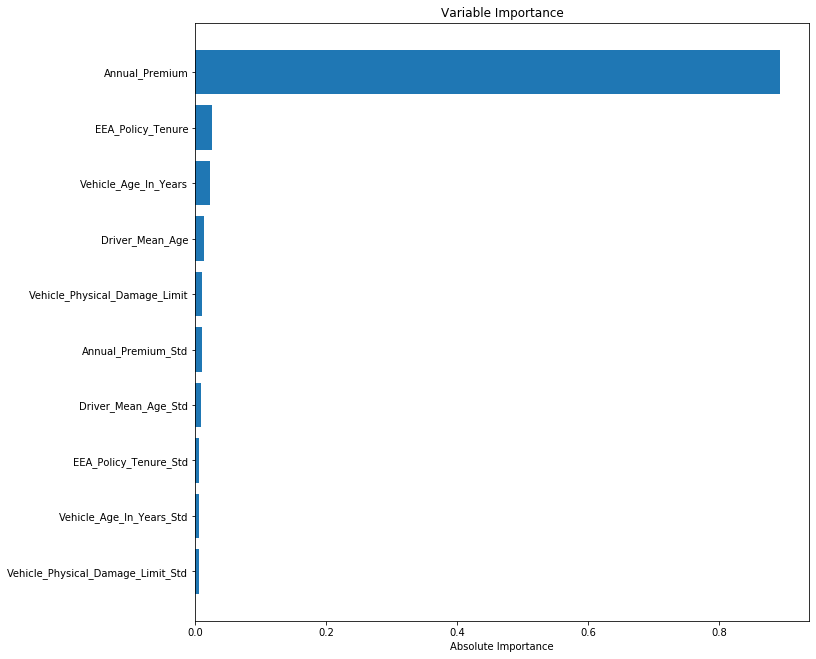

In [34]:
#HERE ARE IMPORTANCE OF EACH FEATURE
feature_importance = gdb.feature_importances_
# make importances relative to max importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(11,11))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Absolute Importance')
plt.title('Variable Importance')
plt.show()

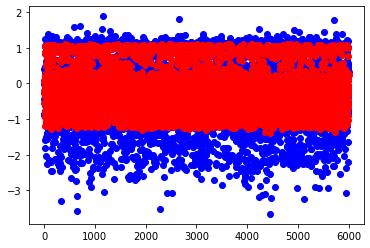

In [35]:
#PLOTTING PREDICTED AND ACTUAL VALUES: RED ARE PREDICTED and BLUE ARE ACTUAL
plt.plot(y_test.values, 'bo')
plt.plot(gdb.predict(X_test), 'ro')

In [36]:
gdb.predict(X_test_scaled).std()

0.023510828936450814

# 2. Prectict test set

In [37]:
#downloading everything from folder testing_portfolios
import glob
portfolios = glob.glob('testing_portfolios/*.csv')

In [38]:
#preprocessing of data in order our model accepted and made predictions
#actually it is the same as we did when constructed new_set
std_test_set = pd.DataFrame(columns=["Driver_Min_Age_Std", 
                                     "Driver_Max_Age_Std", 
                                     "Vehicle_Age_In_Years_Std",
                                     'Vehicle_Physical_Damage_Limit_Std',
#                                     'Vehicle_Miles_To_Work_Std',
                                     'Annual_Premium_Std',
                                     'EEA_Policy_Tenure_Std'], dtype=np.float)

new_test_set = pd.DataFrame(columns=['Vehicle_Age_In_Years',                                    
                                     'Vehicle_Physical_Damage_Limit',
#                                     'Vehicle_Miles_To_Work',
                                     'Driver_Minimum_Age',                          
                                     'Driver_Maximum_Age',                                        
                                     'EEA_Policy_Tenure',                                                                                
                                     'Annual_Premium'])

for i in portfolios:
    
    test_set = pd.read_csv(i)

    sampled_test_set = test_set[['Vehicle_Age_In_Years',                                    
                                 'Vehicle_Physical_Damage_Limit',
#                                 'Vehicle_Miles_To_Work',
                                 'Driver_Minimum_Age',                          
                                 'Driver_Maximum_Age',                                        
                                 'EEA_Policy_Tenure',                                                                               
                                 'Annual_Premium']]

    #obj_test_set = sampled_test_set.select_dtypes(include='object')

    #for i in obj_test_set.columns:
    #    one_hot = pd.get_dummies(sampled_test_set[i], prefix=i)
    #    sampled_test_set = sampled_test_set.drop(i, axis=1)
    #    sampled_test_set = sampled_test_set.join(one_hot)
    
    new_test_set = pd.concat([new_test_set, (sampled_test_set.sum()/len(sampled_test_set)).to_frame().T], ignore_index=True);
    std_test_set = std_test_set.append({'Driver_Min_Age_Std' : sampled_test_set.Driver_Minimum_Age.std(), 
                              'Driver_Max_Age_Std' : sampled_test_set.Driver_Maximum_Age.std(),
                              'Vehicle_Age_In_Years_Std' : sampled_test_set.Vehicle_Age_In_Years.std(),
                              'Vehicle_Physical_Damage_Limit_Std' : sampled_test_set.Vehicle_Physical_Damage_Limit.std(),
#                              'Vehicle_Miles_To_Work_Std' : sampled_test_set.Vehicle_Miles_To_Work.std(),
                              'Annual_Premium_Std' : sampled_test_set.Annual_Premium.std(),
                              'EEA_Policy_Tenure_Std': sampled_test_set.EEA_Policy_Tenure.std()} , ignore_index=True)

In [39]:
new_test_set.head()

,Vehicle_Age_In_Years,Vehicle_Physical_Damage_Limit,Driver_Minimum_Age,Driver_Maximum_Age,EEA_Policy_Tenure,Annual_Premium
0,7.076000,47794.963000,46.328000,47.542000,5.780600,331.804800
1,6.908818,47745.455912,46.904810,47.883768,5.762725,344.051483
2,7.084000,50404.962000,46.056000,47.108000,5.843300,324.789900
3,6.872000,48209.965000,47.041000,48.124000,6.113400,337.672390
4,7.054054,47307.266266,46.279279,47.304304,5.629129,344.488939


In [40]:
#In the same manner introducing new features and getting rid of old ones
new_test_set['Driver_Mean_Age'] = (new_test_set.Driver_Maximum_Age + new_test_set.Driver_Minimum_Age)/2
new_test_set['Driver_Mean_Age_Std'] = (std_test_set.Driver_Max_Age_Std + std_test_set.Driver_Min_Age_Std)/2
new_test_set = new_test_set.join(std_test_set)
new_test_set = new_test_set.drop(['Driver_Maximum_Age', 
                        'Driver_Minimum_Age',
                        'Driver_Max_Age_Std',
                        'Driver_Min_Age_Std'], axis=1)


In [41]:
#normalization of whole our training set 
# scale train dataset
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

#based on training set we do normalization of testing set 
# scale test dataset
X_test_scaled = scaler.transform(new_test_set)

In [42]:
#We train model fully on testing, not on 80% as we did when testing the model 
gdb = GradientBoostingRegressor(learning_rate=0.1)
gdb.fit(X_train_scaled, y_train)

C:\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
#determine score on our training set 
mean_squared_error(y, gdb.predict(X_scaled))

0.3923182982390787

In [44]:
#do prediction 
y_test = gdb.predict(X_test_scaled)

In [45]:
#save to test.csv
df = pd.DataFrame(columns=['ID', 'ln_LR'])

for i, j in zip(portfolios, y_test):
    a = i.replace("testing_portfolios/test_", "")
    a = a.replace(".csv","")
    df = df.append({'ID' : a,
                    'ln_LR' : j}, ignore_index=True)

In [46]:
df.to_csv('test.csv', index=False)

In [47]:
range(0,4)[::-1]

range(3, -1, -1)